# Locate Hunza pixels

Figure out lat/lon locations of Joan's pixels of interest in the Hunza

In [165]:
%pylab notebook
from cetbtools.ease2conv import Ease2Transform
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np

Populating the interactive namespace from numpy and matplotlib


/Users/brodzik/.conda/envs/cetb3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['number', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Read a UIB cube to get projected and lat/lon coordinates.  
Any cube at a given resolution will do, they are all the same.
Use the UL corner of the cube to find out its corresponding offset from the 
full hemisphere grids.

In [63]:
def find_UIB_cube_offset(cubeType=None, verbose=False):
    if not cubeType:
        cubeType = '18H-GRD'
        
    cubeFile = "%s%s%s%s" % (
        "/Users/brodzik/cetb_data/AQUA_AMSRE/N/cubes_UIB/",
        "CETB.cubefile.UIB.AQUA_AMSRE-",
        cubeType,
        "-RSS-v1.2.2003.TB.nc")
        
    f = Dataset(cubeFile, "r", "NETCDF4")   
    lats = f.variables['latitude'][:]
    lons = f.variables['longitude'][:]
    baseGPD = f.variables['crs'].long_name
    f.close()
    
    # find and return the baseGPD (row, col) offset for cubeUL(0, 0) location
    grid = Ease2Transform(baseGPD)
    row_offset, col_offset = grid.geographic_to_grid(lats[0,0], lons[0,0])

    if verbose:
        print("%10s offsets for cubeType=%s" % (baseGPD, cubeType))
        print("(Add these offsets to cube (row, col) to get row, col in full hemisphere)")
        print("offset row = %f, offset col = %f" % (row_offset, col_offset))
        
    return row_offset, col_offset    

In [66]:
types = ['18H-GRD', '18H-SIR', '36H-SIR']
for thisType in types:
    offset_row, offset_col = find_UIB_cube_offset(cubeType=thisType, verbose=True)

EASE2_N25km offsets for cubeType=18H-GRD
(Add these offsets to cube (row, col) to get row, col in full hemisphere)
offset row = 390.000000, offset col = 576.000000
EASE2_N6.25km offsets for cubeType=18H-SIR
(Add these offsets to cube (row, col) to get row, col in full hemisphere)
offset row = 1560.000000, offset col = 2304.000000
EASE2_N3.125km offsets for cubeType=36H-SIR
(Add these offsets to cube (row, col) to get row, col in full hemisphere)
offset row = 3120.000000, offset col = 4608.000000


In [53]:
cubeFile = "CETB.cubefile.UIB.AQUA_AMSRE-18H-GRD-RSS-v1.2.2003.TB.nc"
f = Dataset(cubeFile, "r", "NETCDF4")
x = f.variables['x'][:]
y = f.variables['y'][:]
lats = f.variables['latitude'][:]
lons = f.variables['longitude'][:]
print(f.variables['crs'].long_name)
f.close()

EASE2_N25km


Find out the subset UL corner geographic location and figure out 
which full hemisphere cell this corresponds to

In [157]:
# Figures out the UIB cube subset row,col coordinates at a given lat,lon
def grid_locations_of(lat, lon):
    gpds = ["EASE2_N3.125km", "EASE2_N6.25km", "EASE2_N25km"]
    types = ["36H-SIR", "18H-SIR", "18H-GRD"]
    
    print("Input lat, lon = %.6f, %.6f" % (lat, lon))
    rows = np.zeros((3))
    cols = np.zeros((3))
    for i, (thisGpd, thisType) in enumerate(zip(gpds, types)):
        grid = Ease2Transform(thisGpd)
        row, col = grid.geographic_to_grid(lat, lon)
        print("%15s         : row, col = %.6f, %.6f" % (thisGpd, row, col))
        
        # Get the cube offsets
        offset_row, offset_col = find_UIB_cube_offset(
            cubeType=thisType)
        UIBrow = row - offset_row
        UIBcol = col - offset_col
        print("%15s(%s): row, col = %.6f, %.6f" % ("UIB", thisType, UIBrow, UIBcol))
        rows[i] = UIBrow
        cols[i] = UIBcol

    rows = (rows + 0.5).astype('int32')
    cols = (cols + 0.5).astype('int32')

    print(gpds)
    print("%d %d %d %d %d %d" % (
        cols[0], rows[0],
        cols[1], rows[1],
        cols[2], rows[2]))
    
    
    return (rows, cols)


In [134]:
subULlat, subULlon = 39.461846, 82.092837
grid_locations_of(subULlat, subULlon)


Input lat, lon = 39.461846, 82.092837
[ 0.  0.  0.]
 EASE2_N3.125km         : row, col = 3119.500011, 4607.500014
            UIB(36H-SIR): row, col = -0.499989, -0.499986
  EASE2_N6.25km         : row, col = 1559.500006, 2303.500007
            UIB(18H-SIR): row, col = -0.499994, -0.499993
    EASE2_N25km         : row, col = 389.500001, 575.500002
            UIB(18H-GRD): row, col = -0.499999, -0.499998
['EASE2_N3.125km', 'EASE2_N6.25km', 'EASE2_N25km']
0 0 0 0 0 0


In [135]:
Gilgitlat, Gilgitlon = 35.9261, 74.3711
grid_locations_of(Gilgitlat, Gilgitlon)

Input lat, lon = 35.926100, 74.371100
[ 0.  0.  0.]
 EASE2_N3.125km         : row, col = 3379.873571, 4668.153052
            UIB(36H-SIR): row, col = 259.873571, 60.153052
  EASE2_N6.25km         : row, col = 1689.686785, 2333.826526
            UIB(18H-SIR): row, col = 129.686785, 29.826526
    EASE2_N25km         : row, col = 422.046696, 583.081632
            UIB(18H-GRD): row, col = 32.046696, 7.081632
['EASE2_N3.125km', 'EASE2_N6.25km', 'EASE2_N25km']
60 260 30 130 7 32


In [136]:
Naltarlat, Naltarlon = 36.1667, 74.1833
grid_locations_of(Naltarlat, Naltarlon)

Input lat, lon = 36.166700, 74.183300
[ 0.  0.  0.]
 EASE2_N3.125km         : row, col = 3383.658068, 4659.176768
            UIB(36H-SIR): row, col = 263.658068, 51.176767
  EASE2_N6.25km         : row, col = 1691.579034, 2329.338384
            UIB(18H-SIR): row, col = 131.579034, 25.338384
    EASE2_N25km         : row, col = 422.519759, 581.959596
            UIB(18H-GRD): row, col = 32.519759, 5.959596
['EASE2_N3.125km', 'EASE2_N6.25km', 'EASE2_N25km']
51 264 25 132 6 33


In [137]:
# Ziarat
lat, lon = 36.798, 74.482
grid_locations_of(lat, lon)

Input lat, lon = 36.798000, 74.482000
[ 0.  0.  0.]
 EASE2_N3.125km         : row, col = 3369.017022, 4642.490418
            UIB(36H-SIR): row, col = 249.017022, 34.490418
  EASE2_N6.25km         : row, col = 1684.258511, 2320.995209
            UIB(18H-SIR): row, col = 124.258511, 16.995209
    EASE2_N25km         : row, col = 420.689628, 579.873802
            UIB(18H-GRD): row, col = 30.689628, 3.873802
['EASE2_N3.125km', 'EASE2_N6.25km', 'EASE2_N25km']
34 249 17 124 4 31


In [138]:
# Khunjerab
lat, lon = 36.8411,75.4192
grid_locations_of(lat, lon)

Input lat, lon = 36.841100, 75.419200
[ 0.  0.  0.]
 EASE2_N3.125km         : row, col = 3339.770572, 4648.936526
            UIB(36H-SIR): row, col = 219.770572, 40.936526
  EASE2_N6.25km         : row, col = 1669.635286, 2324.218263
            UIB(18H-SIR): row, col = 109.635286, 20.218263
    EASE2_N25km         : row, col = 417.033822, 580.679566
            UIB(18H-GRD): row, col = 27.033822, 4.679566
['EASE2_N3.125km', 'EASE2_N6.25km', 'EASE2_N25km']
41 220 20 110 5 27


In [148]:
def find_UIB_cube_geographic_at(row, col, cubeType=None, verbose=False):
    if not cubeType:
        cubeType = '36H-SIR'
        
    cubeFile = "%s%s%s%s" % (
        "/Users/brodzik/cetb_data/AQUA_AMSRE/N/cubes_UIB/",
        "CETB.cubefile.UIB.AQUA_AMSRE-",
        cubeType,
        "-RSS-v1.2.2003.TB.nc")
        
    f = Dataset(cubeFile, "r", "NETCDF4")   
    lats = f.variables['latitude'][:]
    lons = f.variables['longitude'][:]
    baseGPD = f.variables['crs'].long_name
    f.close()
    
    if verbose:
        print("base=%10s for cubeType=%s" % (baseGPD, cubeType))
        print("row, col = %f, %f" % (row, col))
        print("lat, lon = %f, %f" % (lats[row, col], lons[row, col]))
        
    return (lats[row, col], lons[row, col])

In [151]:
# Melt Onset pixels (in 3 km grid)
pixel_cols = np.array([39, 30, 65, 61, 57, 50])
pixel_rows = np.array([256, 253, 217, 243, 243, 254])
for (row, col) in zip(pixel_rows, pixel_cols):
    lat, lon = find_UIB_cube_geographic_at(row, col, verbose=True)
    grid_locations_of(lat, lon)
    print("")

base=EASE2_N3.125km for cubeType=36H-SIR
row, col = 256.000000, 39.000000
lat, lon = 36.602004, 74.309669
Input lat, lon = 36.602004, 74.309669
 EASE2_N3.125km         : row, col = 3376.000000, 4647.000000
            UIB(36H-SIR): row, col = 256.000000, 39.000000
  EASE2_N6.25km         : row, col = 1687.750000, 2323.250000
            UIB(18H-SIR): row, col = 127.750000, 19.250000
    EASE2_N25km         : row, col = 421.562500, 580.437500
            UIB(18H-GRD): row, col = 31.562500, 4.437500
['EASE2_N3.125km', 'EASE2_N6.25km', 'EASE2_N25km']
39 256 19 128 4 32

base=EASE2_N3.125km for cubeType=36H-SIR
row, col = 253.000000, 30.000000
lat, lon = 36.900443, 74.323920
Input lat, lon = 36.900443, 74.323920
 EASE2_N3.125km         : row, col = 3373.000000, 4638.000000
            UIB(36H-SIR): row, col = 253.000000, 30.000000
  EASE2_N6.25km         : row, col = 1686.250000, 2318.750000
            UIB(18H-SIR): row, col = 126.250000, 14.750000
    EASE2_N25km         : row, col = 421

# Plot Dainyor Bridge streamflow vs. Divide4 and Divide5 TBs/DAV


In [201]:
# Specify pixel label, lat, lon
#label = "Divide4"
#lat = 36.041678
#lon = 74.880428
label = "Divide5"
lat = 36.163646
lon = 74.848112


In [202]:
# Get pixel locations in respective grids:
cols, rows = grid_locations_of(lat, lon)
cols, rows

Input lat, lon = 36.163646, 74.848112
 EASE2_N3.125km         : row, col = 3363.000000, 4665.000010
            UIB(36H-SIR): row, col = 243.000000, 57.000010
  EASE2_N6.25km         : row, col = 1681.250000, 2332.250005
            UIB(18H-SIR): row, col = 121.250000, 28.250005
    EASE2_N25km         : row, col = 419.937500, 582.687501
            UIB(18H-GRD): row, col = 29.937500, 6.687501
['EASE2_N3.125km', 'EASE2_N6.25km', 'EASE2_N25km']
57 243 28 121 7 30


(array([243, 121,  30], dtype=int32), array([57, 28,  7], dtype=int32))

In [159]:
# AMSR-E data started mid-2002, so open the 36V SIR cubefile for 2003
# and pull the 36V TBs for the 3km pixels

In [203]:
cubeType = '36V-SIR'
year = 2003
cubeFile = "%s%s%s%s" % (
        "/Users/brodzik/cetb_data/AQUA_AMSRE/N/cubes_UIB/",
        "CETB.cubefile.UIB.AQUA_AMSRE-",
        cubeType,
        "-RSS-v1.2.%4d.TB.nc" % (year))
f = Dataset(cubeFile, "r", "NETCDF4")   
t36V = f.variables['TB'][:]
time = f.variables['time'][:]
f.close()
print("%s, TB=" % label)
ts = t36V[:, rows[0], cols[0]]
print(ts)


Divide5, TB=
[246.6599884033203 234.6699981689453 -- 233.97000122070312
 246.17999267578125 -- -- 225.26998901367188 253.89999389648438 -- --
 235.47000122070312 247.9399871826172 -- 248.54998779296875 228.5
 248.20999145507812 228.47999572753906 247.87998962402344
 229.00999450683594 -- 225.80999755859375 245.6699981689453 -- --
 221.0699920654297 252.62998962402344 -- 251.6999969482422
 230.63999938964844 255.29998779296875 231.39999389648438 255.9399871826172
 235.70999145507812 -- 231.3199920654297 259.05999755859375
 231.62998962402344 -- 229.14999389648438 255.8300018310547 -- --
 228.9499969482422 250.86000061035156 -- 249.04998779296875
 232.22999572753906 251.12998962402344 228.44000244140625
 252.33999633789062 228.61000061035156 -- 234.12998962402344
 246.01998901367188 -- -- 236.4399871826172 249.239990234375 --
 252.45999145507812 242.4399871826172 248.17999267578125 235.29998779296875
 252.09999084472656 233.72999572753906 -- 226.01998901367188
 255.92999267578125 227.149

In [204]:
dav = ts[1::2] - ts[0::2]

<IPython.core.display.Javascript object>


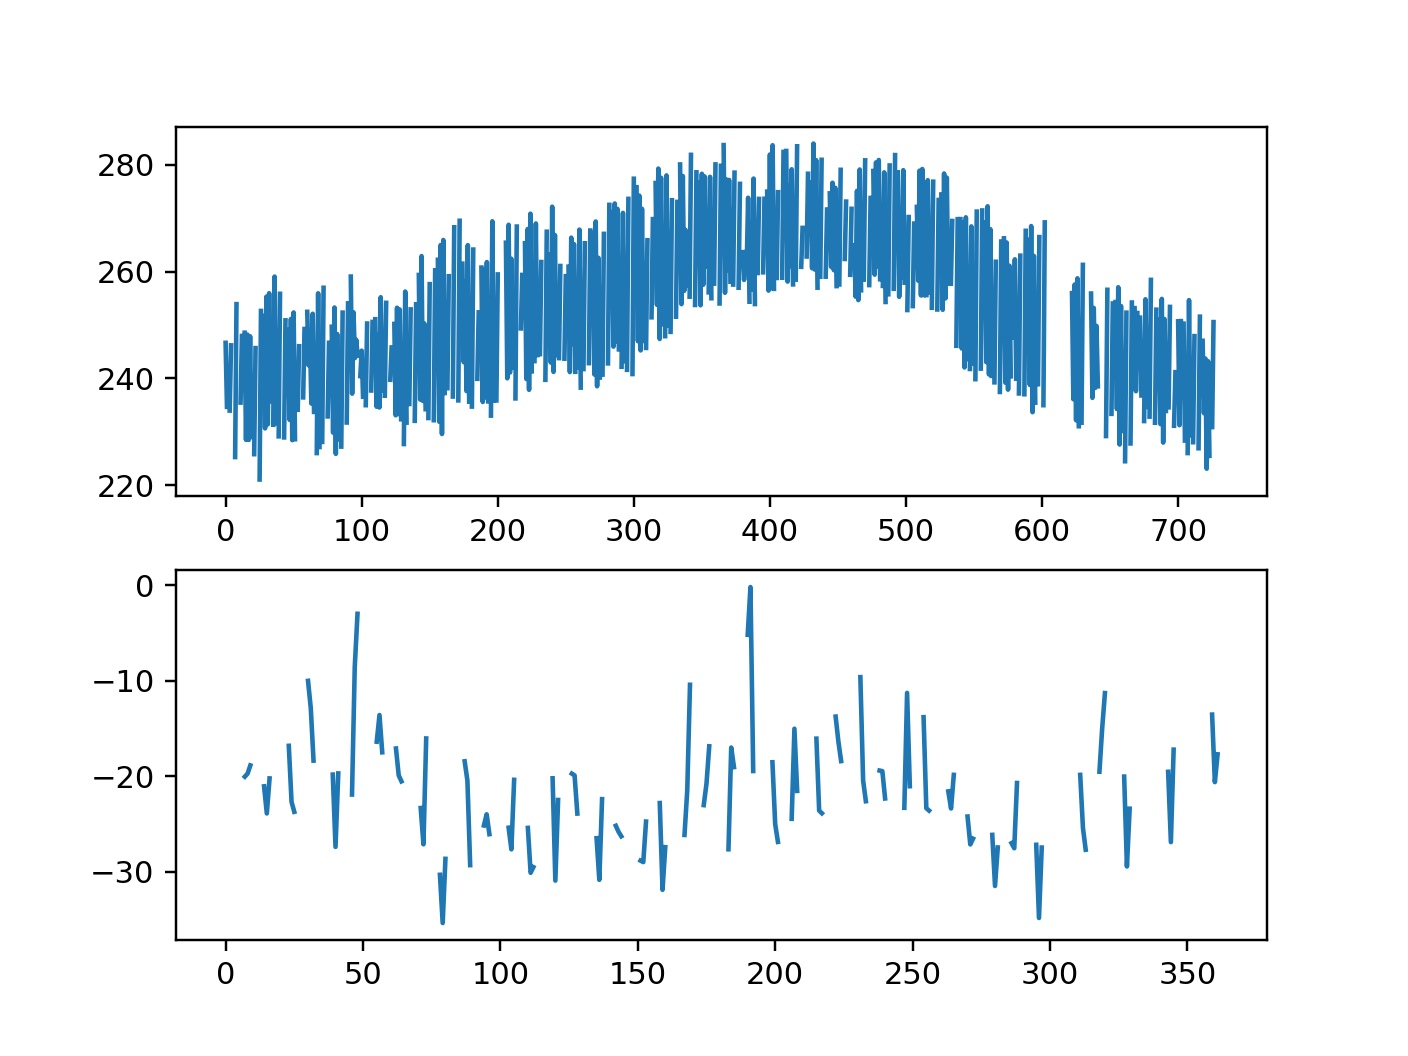

In [205]:
fig, ax = plt.subplots(2)
ax[0].plot(ts)
ax[1].plot(dav)


In [25]:
subULlat, subULlon = 42.6, 152.0
subLRlat, subLRlon = 34.5, 119.0
find_25km_map_corners(subULlat, subULlon, subLRlat, subLRlon)


Subset UL row,col = 178.155416, 455.922626
Subset LR row,col = 244.219209, 567.472053
Outer 25km, subset UL row,col = 177.500000, 455.500000
Outer 25km, subset LR row,col = 244.500000, 567.500000
Number of rows = 68.000000
Number of cols = 113.000000
Subset UL x,y = 2400000.000000, 4550000.000000
Subset LR x,y = 5200000.000000, 2875000.000000
Corner UL lat,lon = 42.506249, 152.189585
Corner LR lat,lon = 34.528398, 118.937531


In [190]:
test = np.arange(10)
test

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [194]:
morning = test[0::2]
evening = test[1::2]

In [195]:
print(evening)
print(morning)

[1 3 5 7 9]
[0 2 4 6 8]


In [153]:
cols = np.array([0.5, 2.1, 3.8])
cols

array([ 0.5,  2.1,  3.8])

In [154]:
cols + 0.5

array([ 1. ,  2.6,  4.3])

In [156]:
(cols + 0.5).astype('int32')

array([1, 2, 4], dtype=int32)